In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random

In [7]:
# Load the dataset
df = pd.read_csv('dataset.csv')
X = df[['TV', 'radio', 'newspaper']]
Y = df['sales']

In [8]:
# Standardize the data
Y = (Y - Y.mean()) / Y.std()
X = (X - X.mean()) / X.std()

In [9]:
def initialize(dim):
    b = random.random()
    theta = np.random.rand(dim)
    return b, theta

def predict_Y(b, theta, X):
    return b + np.dot(X, theta)

def get_cost(Y, Y_hat):
    Y_resid = Y - Y_hat
    return np.sum(Y_resid ** 2) / (2 * len(Y_resid))


In [10]:
def update_theta(x, y, y_hat, b_0, theta_0, learning_rate):
    db = (np.sum(y_hat - y)) / len(y)
    dw = (np.dot(y_hat - y, x)) / len(y)
    b_1 = b_0 - learning_rate * db
    theta_1 = theta_0 - learning_rate * dw
    return b_1, theta_1


In [11]:
def get_random_mini_batch(X, Y, batch_size):
    indices = random.sample(range(len(X)), batch_size)
    X_mini_batch = X.iloc[indices]
    Y_mini_batch = Y.iloc[indices]
    return X_mini_batch, Y_mini_batch


In [12]:
def run_stochastic_gradient_descent(X, Y, alpha=0.01, num_iterations=100, batch_size=10):
    b, theta = initialize(X.shape[1])
    gd_iterations_df = pd.DataFrame(columns=['iteration', 'cost'])

    for iter_num in range(num_iterations):
        X_mini_batch, Y_mini_batch = get_random_mini_batch(X, Y, batch_size)
        Y_hat = predict_Y(b, theta, X_mini_batch)

        this_cost = get_cost(Y_mini_batch, Y_hat)

        prev_b = b
        prev_theta = theta
        b, theta = update_theta(X_mini_batch, Y_mini_batch, Y_hat, prev_b, prev_theta, alpha)

        if (iter_num % 10 == 0):
            gd_iterations_df = gd_iterations_df.append({'iteration': iter_num, 'cost': this_cost}, ignore_index=True)

    print("Final Estimate of b and theta : ", b, theta)
    return gd_iterations_df, b, theta

C:\Users\Hamza\AppData\Local\Temp\ipykernel_8512\250736490.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iterations_df = gd_iterations_df.append({'iteration': iter_num, 'cost': this_cost}, ignore_index=True)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_8512\250736490.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iterations_df = gd_iterations_df.append({'iteration': iter_num, 'cost': this_cost}, ignore_index=True)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_8512\250736490.py:16: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gd_iterations_df = gd_iterations_df.append({'iteration': iter_num, 'cost': this_cost}, ignore_index=True)
C:\Users\Hamza\AppData\Local\Temp\ipykernel_8512\250736490.py:16: FutureWarning

Final Estimate of b and theta :  -0.0146549770067123 [0.70239951 0.45270265 0.13691321]


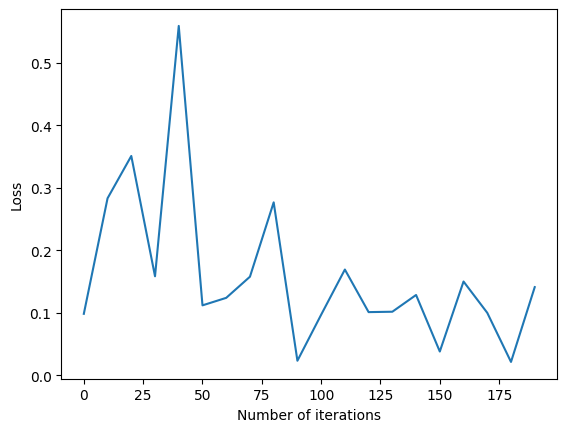

In [13]:
# Call the stochastic gradient descent function
gd_iterations_df, b, theta = run_stochastic_gradient_descent(X, Y, alpha=0.01, num_iterations=200, batch_size=10)

# Plot the cost over iterations
plt.plot(gd_iterations_df['iteration'], gd_iterations_df['cost'])
plt.xlabel("Number of iterations")
plt.ylabel("Loss")
plt.savefig("MSE_Loss_stochastic.png")